In [1]:
import matplotlib.pyplot as plt
import qutip as qt
import numpy as np

$$H=\sum_{i<j}\frac{J_0}{4|i-j|^{\alpha}}(S_+^{(i)} S_-^{(j)}+S_-^{(i)} S_+^{(j)})=\frac{J_0}{4}S_+^{(1)}S_-^{(2)}+S_-^{(1)}S_+^{(2)}$$

In [ ]:
SPIN = 1
n = int(2 * SPIN + 1) # spin multiplicity
_Sp = qt.spin_Jp(SPIN)
_Sm = qt.spin_Jm(SPIN)
_Sx = qt.spin_Jx(SPIN)
_Sy = qt.spin_Jy(SPIN)
_Sz = qt.spin_Jz(SPIN)

N_IONS = 2
J0 = 1.3094570021973102e3 * 2 * np.pi
V01 = 200 * 2 * np.pi
V02 = 150 * 2 * np.pi
alpha = 1.0  # power law exponent

Sp = [qt.tensor([qt.qeye(n)] * i + [_Sp] + [qt.qeye(n)] * (N_IONS - i - 1)) for i in range(N_IONS)]
Sm = [qt.tensor([qt.qeye(n)] * i + [_Sm] + [qt.qeye(n)] * (N_IONS - i - 1)) for i in range(N_IONS)]
Sz = [qt.tensor([qt.qeye(n)] * i + [_Sz] + [qt.qeye(n)] * (N_IONS - i - 1)) for i in range(N_IONS)]

H = qt.qzero(Sm[0].dims[0])
for i in range(N_IONS):
    for j in range(i + 1, N_IONS):
        H += (Sp[i] * Sm[j] + Sm[i] * Sp[j]) * (-J0 * 0.25 / (np.abs(i - j) ** alpha))
H += V01 * Sz[1] - V02 * Sz[1] ** 2

psi_0 = qt.tensor([qt.basis(n, 1)] * N_IONS)
t = np.linspace(0, 2e-3, 1000)


# 0 -> |+>
# 1 -> |0>
# 2 -> |->
state = {
    '00': qt.tensor([qt.basis(n, 1), qt.basis(n, 1)]),
    '0+': qt.tensor([qt.basis(n, 1), qt.basis(n, 0)]),
    '0-': qt.tensor([qt.basis(n, 1), qt.basis(n, 2)]),
    '+0': qt.tensor([qt.basis(n, 0), qt.basis(n, 1)]),
    '-0': qt.tensor([qt.basis(n, 2), qt.basis(n, 1)]),
    '++': qt.tensor([qt.basis(n, 0), qt.basis(n, 0)]),
    '--': qt.tensor([qt.basis(n, 2), qt.basis(n, 2)]),
    '+-': qt.tensor([qt.basis(n, 0), qt.basis(n, 2)]),
    '-+': qt.tensor([qt.basis(n, 2), qt.basis(n, 0)]),
}


proj_00 = psi_0 * psi_0.dag()
proj_0p_0m = (state['0+'] + state['0-']) * (state['0+'] + state['0-']).dag() / 2
proj_m0_p0 = (state['-0'] + state['+0']) * (state['-0'] + state['+0']).dag() / 2
proj_pp_pm_mp_mm = (state['++'] + state['+-'] + state['-+'] + state['--']) * (state['++'] + state['+-'] + state['-+'] + state['--']).dag() / 2

proj_mm = (state['--']) * (state['--']).dag()
proj_m0_mp = (state['-0'] + state['-+']) * (state['-0'] + state['-+']).dag()
proj_0m_pm = (state['0-'] + state['+-']) * (state['0-'] + state['+-']).dag()
proj_00_0p_p0_pp = (state['00'] + state['0+'] + state['+0'] + state['++']) * (state['00'] + state['0+'] + state['+0'] + state['++']).dag()

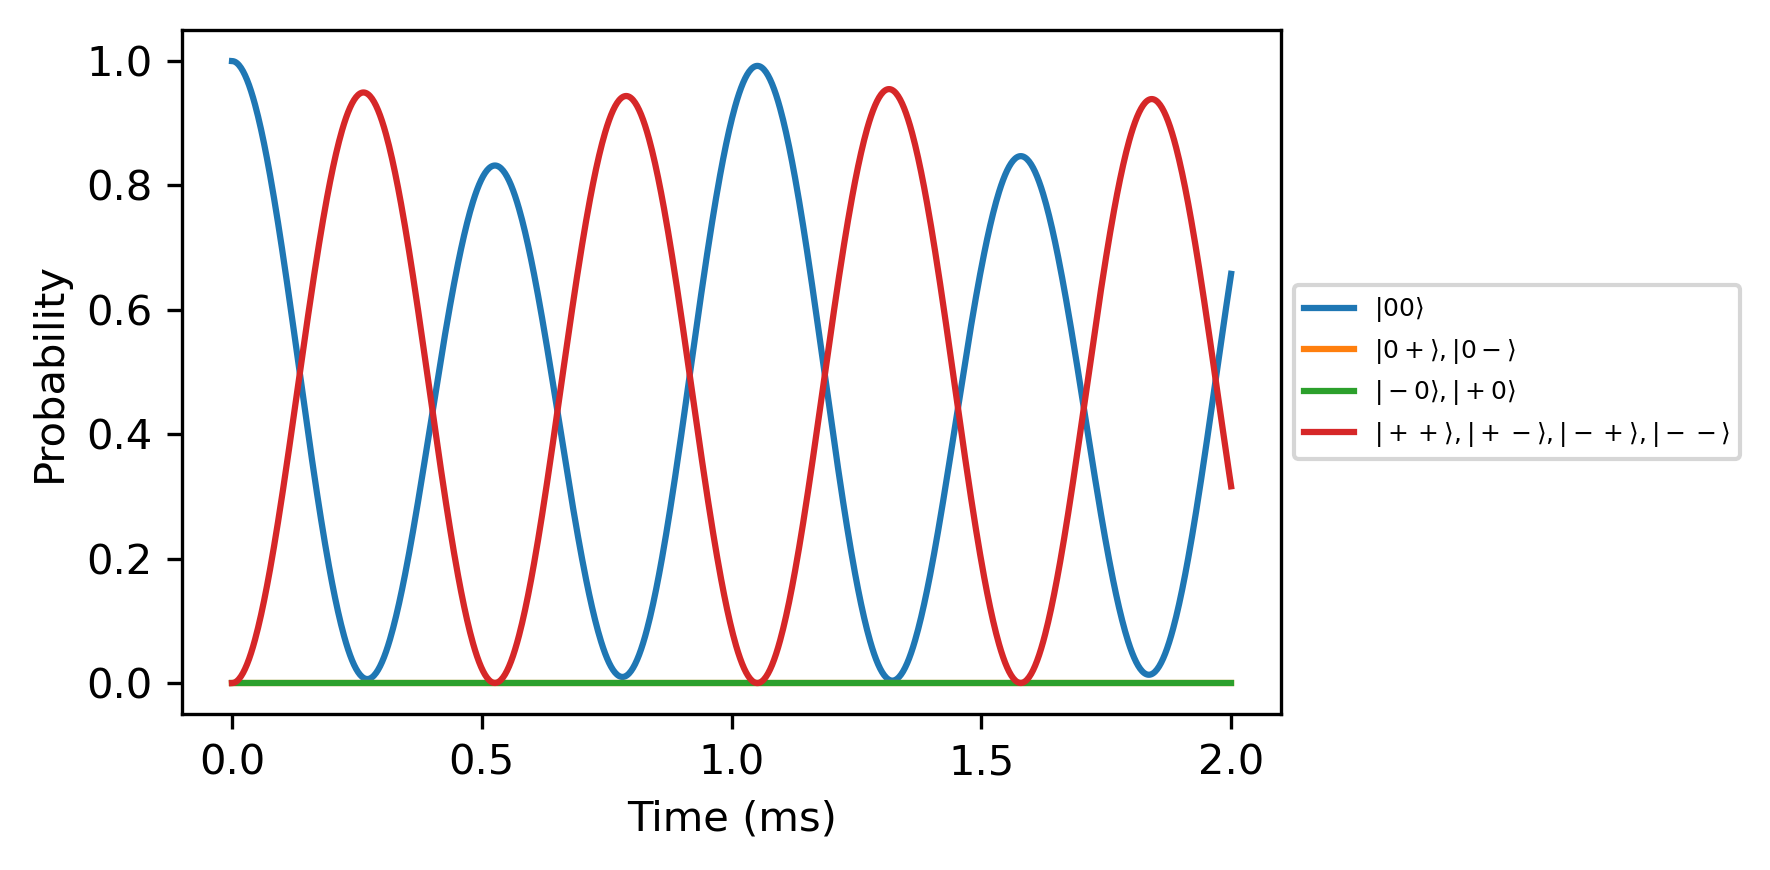

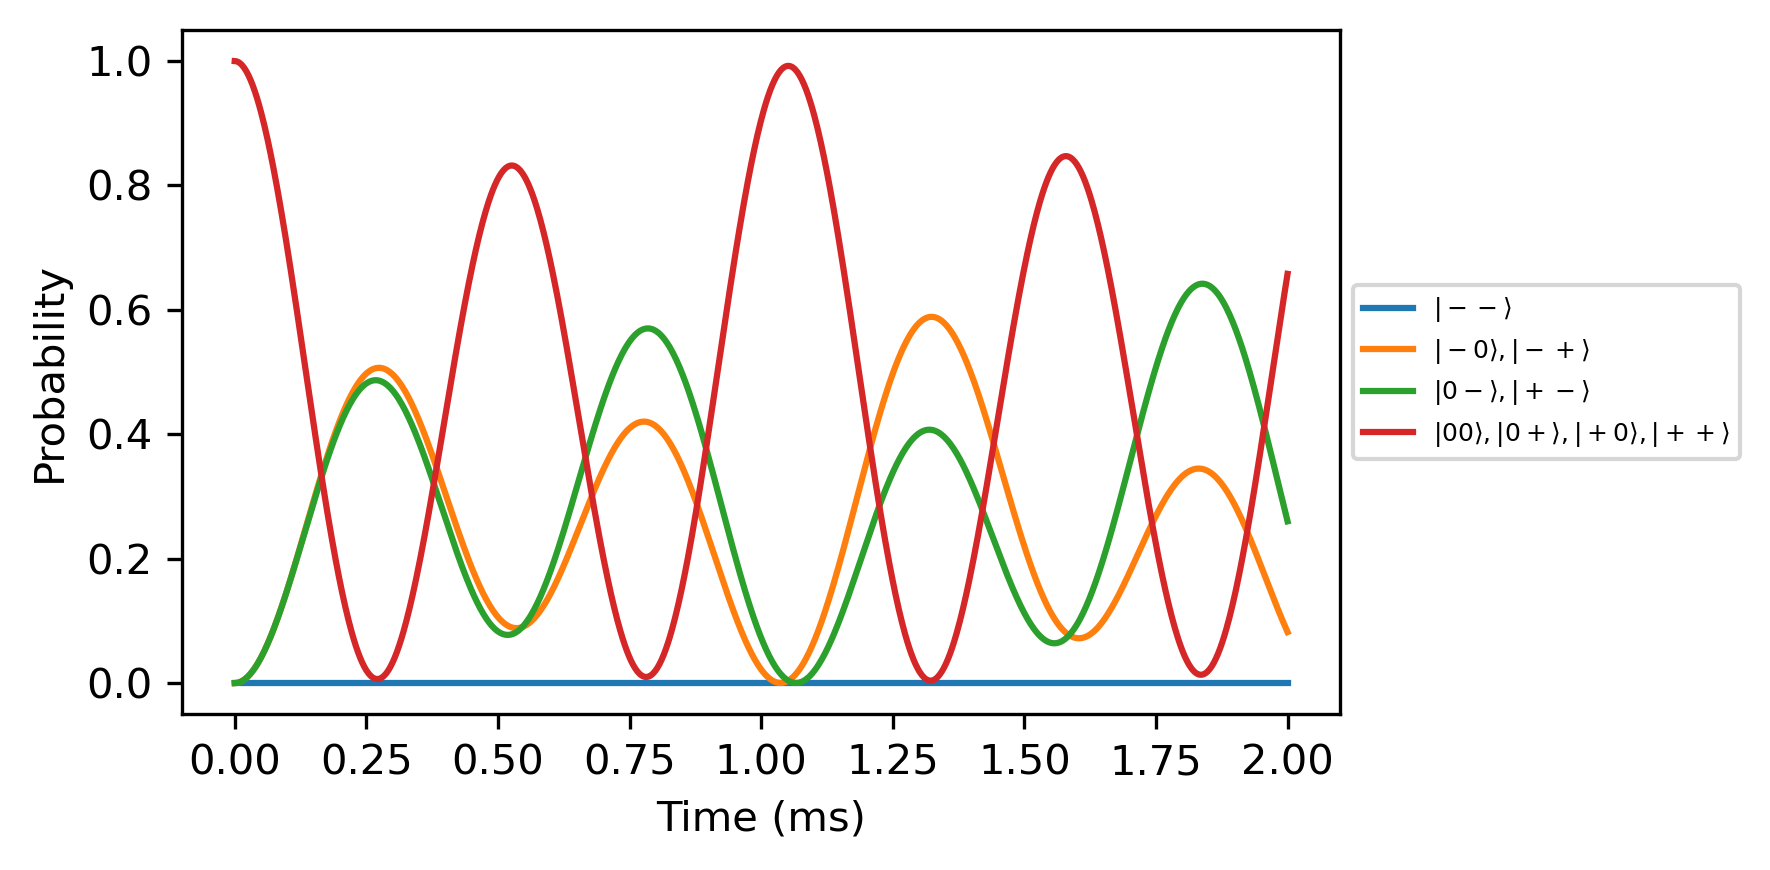

In [6]:
sol_1 = qt.mesolve(H, psi_0, t, [], [proj_00, proj_0p_0m, proj_m0_p0, proj_pp_pm_mp_mm])

plt.figure(figsize=(6, 3), dpi=300)
for i, label in enumerate(['$|00\\rangle$', '$|0+\\rangle, |0-\\rangle$', '$|-0\\rangle, |+0\\rangle$', '$|++\\rangle, |+-\\rangle, |-+\\rangle, |--\\rangle$']):
    plt.plot(t*1e3, sol_1.expect[i], label=label)
plt.xlabel('Time (ms)')
plt.ylabel('Probability')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=6)
plt.tight_layout()
plt.show()

sol_2 = qt.mesolve(H, psi_0, t, [], [proj_mm, proj_m0_mp, proj_0m_pm, proj_00_0p_p0_pp])

plt.figure(figsize=(6, 3), dpi=300)
for i, label in enumerate(['$|--\\rangle$', '$|-0\\rangle, |-+\\rangle$', '$|0-\\rangle, |+-\\rangle$', '$|00\\rangle, |0+\\rangle, |+0\\rangle, |++\\rangle$']):
    plt.plot(t*1e3, sol_2.expect[i], label=label)
plt.xlabel('Time (ms)')
plt.ylabel('Probability')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=6)
plt.tight_layout()
plt.show()
